# DATA ANALYSIS - SPORTS (IPL)
### AUTHOR- AVINASH SOY
### THIS PROJECT IS A PART OF THE SPARKS FOUNDATION #GRIPFEB 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output

## IMPORT THE REQUIRED FILES

In [2]:
matches=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires',matches['umpire1'].nunique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
Total venues played at: 32

Total umpires 61


### dataset has data of 756 matches which is conducted in 32 places with 61 umpires

In [6]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### to check null values in each columns

In [7]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
matches.drop('umpire3', axis=1, inplace=True)

In [9]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [10]:
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [11]:
matches[matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


##### so in 2014 season, from the data of 7 matches, we found city is missing
##### lets fill the data using internet
##### so we found that these missing valued matches were played in Dubai International Cricket Stadium

In [12]:
matches.city=matches.city.fillna('Dubai')
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

##### now winner and player of match column has 4 null values so let's try to fill it

In [13]:
matches[matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


##### since these matches has no result due to cancellation of these matches, therefore winner and man of the match can't be defined.

In [14]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [16]:
delivery.shape

(179078, 21)

##### so we have 179078 deliveries data with 21 columns from 756 matches

# TEAM ANALYSIS

In [17]:
team=matches['winner'].value_counts()
team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

##### we got rising pune supergiants , due to some spelling mistake to we will replace 'Rising Pune Supergiant' by 'Rising Pune Supergiants'

In [18]:
matches['winner'].replace(to_replace='Rising Pune Supergiant' , value='Rising Pune Supergiants', inplace=True)

In [19]:
team=matches['winner'].value_counts()
team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

#####  out of 14 teams, Mumbai Indians & Chennai Superkings are the 2 most successful teams ever in IPL

In [20]:
len(team) #to check how many teams participate in IPL in these years

14

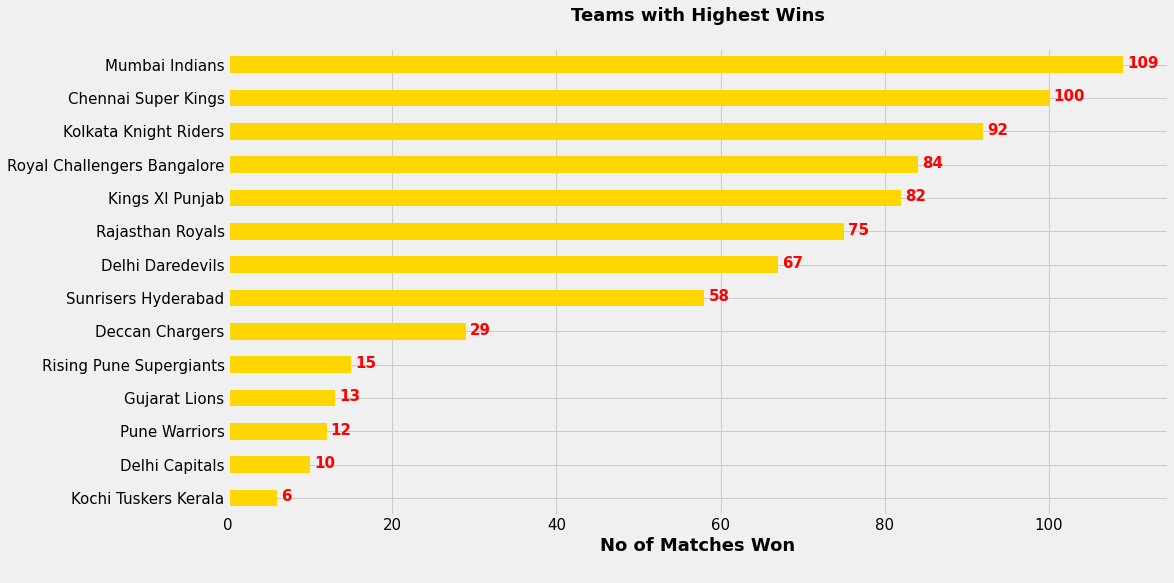

In [21]:
teams=team.plot.barh(figsize=(15,8),color='gold',fontsize=15)

teams.set_title('Teams with Highest Wins\n',fontsize=18, fontweight='bold')
teams.set_xlabel('No of Matches Won\n', fontsize=18, fontweight='bold')
teams.invert_yaxis()

for i in teams.patches:
    teams.text(i.get_width()+0.5, i.get_y()+0.35, i.get_width(), fontsize=15, fontweight='bold', color='red')

In [22]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

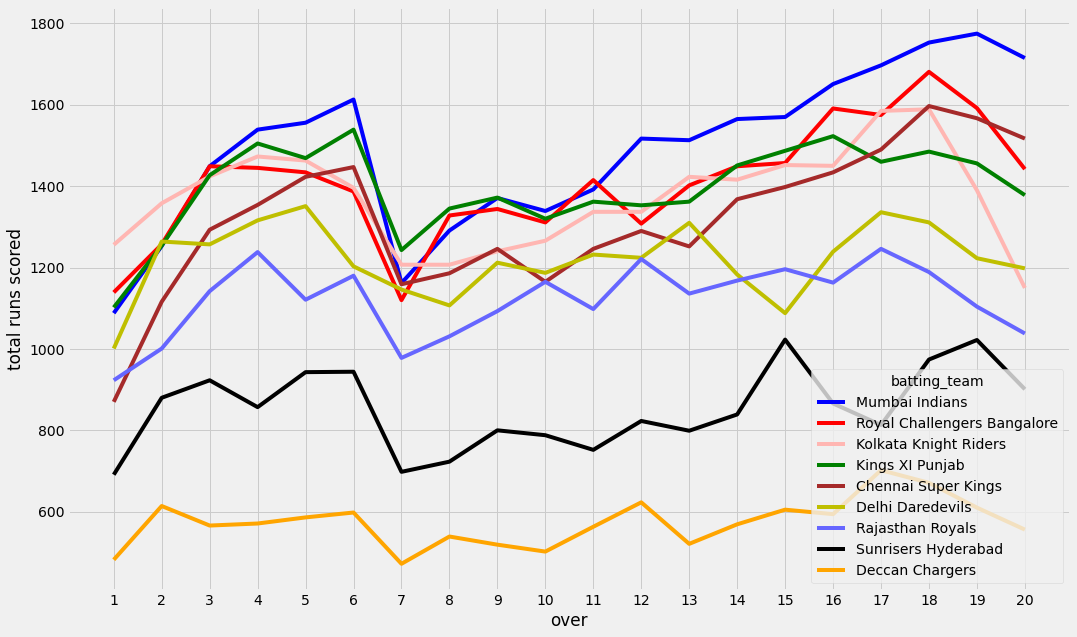

In [23]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

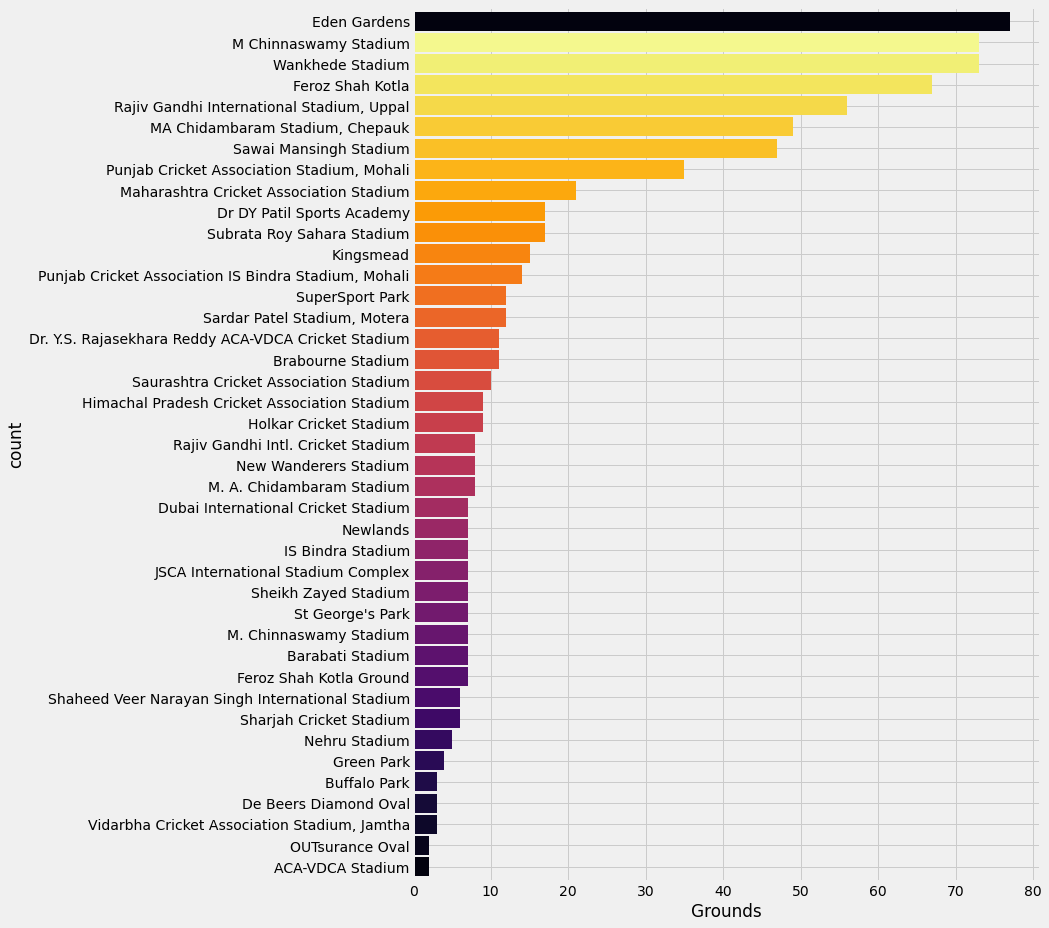

In [24]:
plt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

In [25]:
print("Biggest Win by Run Margin is",matches['win_by_runs'].max(),"runs")

Biggest Win by Run Margin is 146 runs


In [26]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

##### that match was played b/w Mumbai Indians and Delhi Daredevils on 6th May 2017 at FerozShah Kotla Stadium, Delhi and Man of the Match was LMP Simmons

In [27]:
print("Biggest Win by Wicket Margin is",matches['win_by_wickets'].max(),"wickets")
matches.iloc[matches['win_by_wickets'].idxmax()]

Biggest Win by Wicket Margin is 10 wickets


id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

##### above match mentioned was played b/w Gujarat Lions and Kolkata Knight Riders in 7th April 2017 at Saurashtra Cricket Association Stadium, Rajkot and Man of the Match was Chris Lynn

In [28]:
more_10wickets_match=matches[matches.win_by_wickets==10]

In [29]:
more_10wickets_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


In [30]:
more_10wickets_match['winner'].value_counts()

Royal Challengers Bangalore    3
Kolkata Knight Riders          1
Kings XI Punjab                1
Deccan Chargers                1
Delhi Daredevils               1
Rajasthan Royals               1
Mumbai Indians                 1
Chennai Super Kings            1
Sunrisers Hyderabad            1
Name: winner, dtype: int64

##### Royal Challengers won the most 10 wicket margin win

In [31]:
print(more_10wickets_match['winner'].value_counts().sum(),"matches played in IPL where wickets margin is 10")

11 matches played in IPL where wickets margin is 10


In [32]:
dinner=matches[['season','winner']]
teams_most_title={} #create a empty dict with name and most number of title
for i in sorted(dinner.season.unique()):
    teams_most_title[i]=dinner[dinner.season==i]['winner'].tail(1).values[0]
    
season_winner=pd.Series(teams_most_title)
season_winner=pd.DataFrame(season_winner, columns=['Season_Winner'])

In [33]:
season_winner

,Season_Winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


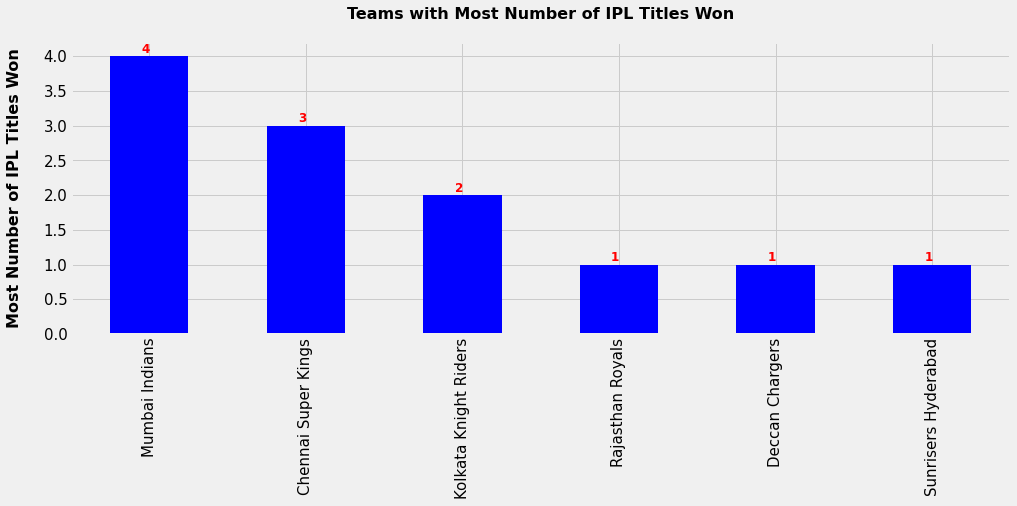

In [34]:
season_win= season_winner['Season_Winner'].value_counts().plot(kind='bar',figsize=(15,5), color='blue', fontsize=15)
season_win.set_title('Teams with Most Number of IPL Titles Won\n', fontsize=16, fontweight='bold')
season_win.set_ylabel('Most Number of IPL Titles Won\n', fontsize=16, fontweight='bold')
for i in season_win.patches:
    season_win.text(i.get_x()+0.2, i.get_height()+0.05, i.get_height(), fontsize=12, fontweight='bold',color='red')

##### Mumbai Indians is the most successful IPL Team with 4 titles followed by Chennai Super Kings with 3IPL titles and Kolkata Knight Riders with 2 IPL Titles.

In [35]:
most_toss_win=matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [36]:
matches['toss_winner'].replace(to_replace='Rising Pune Supergiant' , value='Rising Pune Supergiants', inplace=True)

In [37]:
most_toss_win=matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

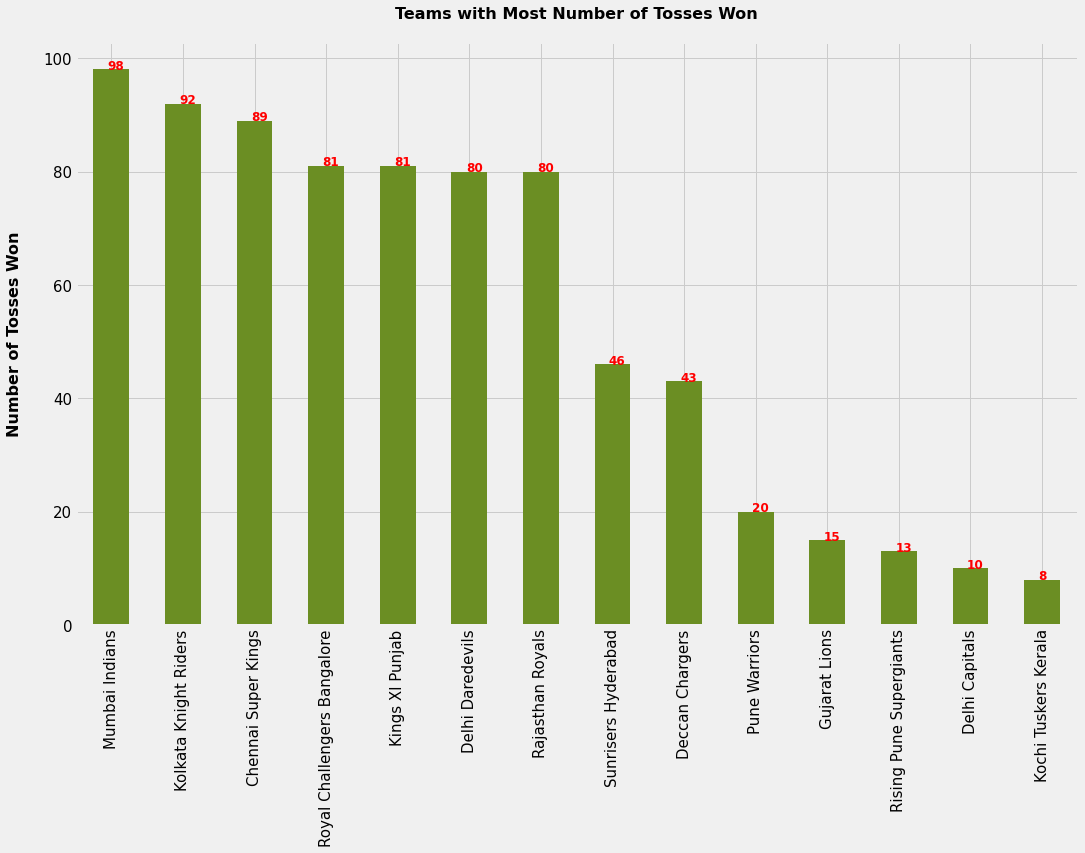

In [38]:
most_toss_win_graph=most_toss_win.plot.bar(figsize=(16,10), color='olivedrab', fontsize=15)
most_toss_win_graph.set_title('Teams with Most Number of Tosses Won\n', fontsize=16, fontweight='bold')
most_toss_win_graph.set_ylabel('Number of Tosses Won\n', fontsize=16, fontweight='bold')
for i in most_toss_win_graph.patches:
    most_toss_win_graph.text(i.get_x()+0.2, i.get_height()+0.05, i.get_height(), fontsize=12, fontweight='bold',color='red')

In [39]:
toss_decide=matches['toss_decision'].value_counts()
toss_decide

field    463
bat      293
Name: toss_decision, dtype: int64

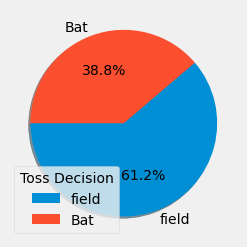

In [40]:
plt.pie(toss_decide,data = toss_decide, labels= ["field","Bat"],autopct = "%2.1f%%",shadow = True, startangle = 180)
plt.legend(title = "Toss Decision")
plt.show()


C:\Users\nanug\.conda\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Frequency')

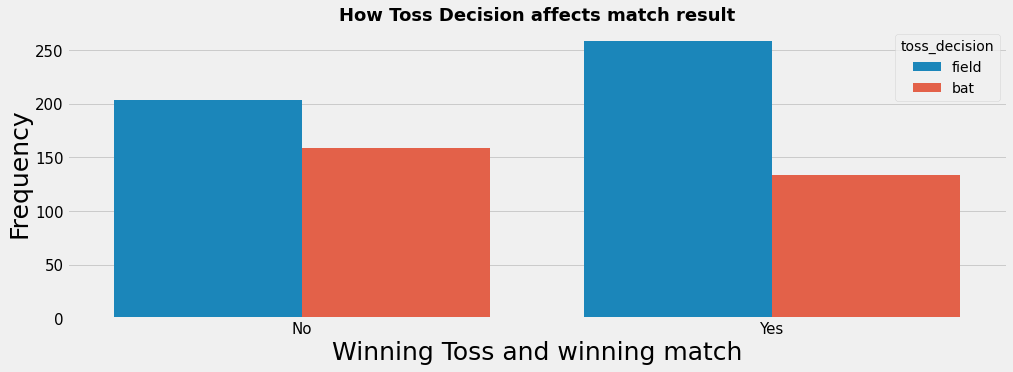

In [41]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

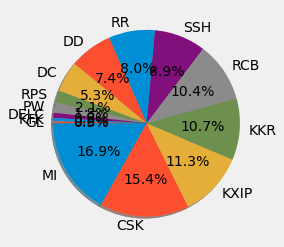

In [42]:
wins_batting_first=matches.winner[matches.win_by_runs!=0].value_counts()
wins_batting_first
plt.pie(wins_batting_first,data = wins_batting_first, labels= ["MI","CSK","KXIP","KKR",'RCB','SSH','RR','DD','DC','RPS','PW','DELC','KTK','GL'],autopct = "%2.1f%%",shadow = True, startangle = 180)
plt.show()

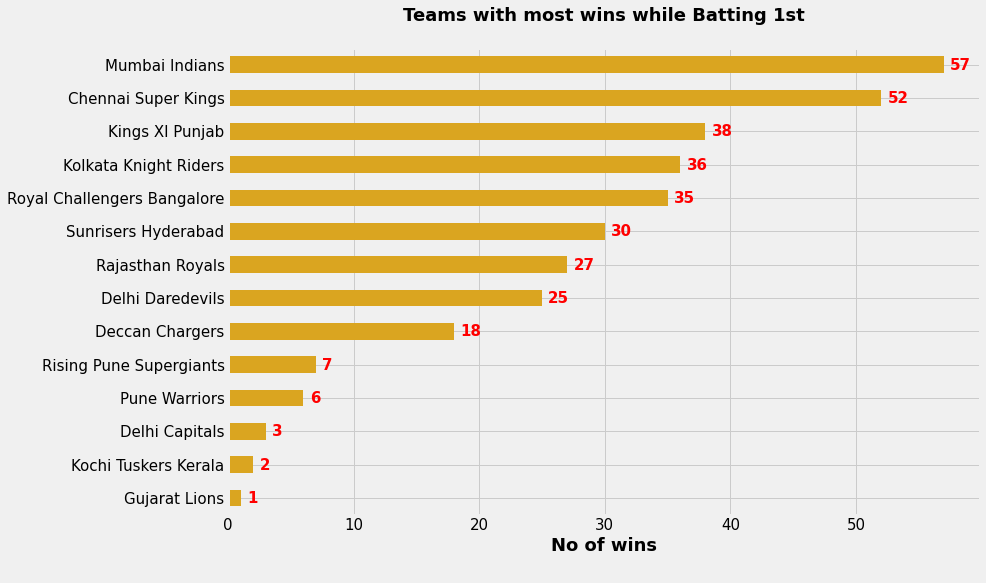

In [43]:
most_wins_batting_first=wins_batting_first.plot(kind='barh',figsize=(12,8),color='goldenrod',fontsize=15)
most_wins_batting_first.set_title('Teams with most wins while Batting 1st\n', fontsize=18,fontweight='bold')
most_wins_batting_first.set_xlabel('No of wins\n', fontsize=18,fontweight='bold')
most_wins_batting_first.invert_yaxis()


for i in most_wins_batting_first.patches:
    most_wins_batting_first.text(i.get_width()+0.5, i.get_y()+0.40, i.get_width(), fontsize=15, fontweight='bold', color='red') 

##### Mumbai Indians is the best team when we talk about defending the score

In [44]:
wins_batting_second=matches.winner[matches.win_by_wickets!=0].value_counts()
wins_batting_second

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

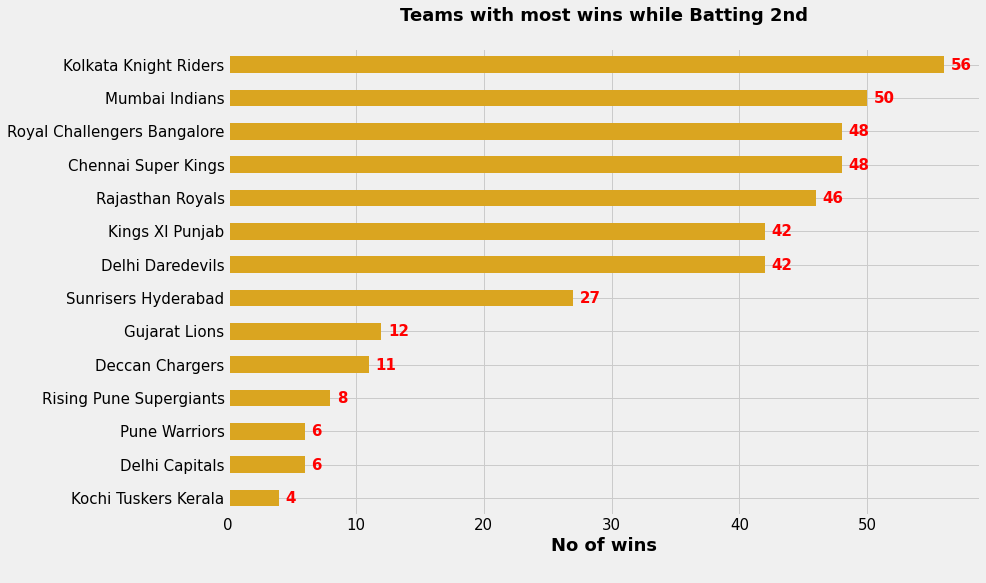

In [45]:
most_wins_batting_second=wins_batting_second.plot(kind='barh',figsize=(12,8),color='goldenrod',fontsize=15)
most_wins_batting_second.set_title('Teams with most wins while Batting 2nd\n', fontsize=18,fontweight='bold')
most_wins_batting_second.set_xlabel('No of wins\n', fontsize=18,fontweight='bold')
most_wins_batting_second.invert_yaxis()


for i in most_wins_batting_second.patches:
    most_wins_batting_second.text(i.get_width()+0.5, i.get_y()+0.40, i.get_width(), fontsize=15, fontweight='bold', color='red') 

##### KOLKATA KNIGHT RIDERS has won most no of matches while chasing the score/target.

### ANALYSIS OF IPL TEAM- MAJOR POINTS
<blockquote>Out of 14 teams participated in IPL, only 6 teams has won the title</blockquote>
<blockquote>Mumbai Indians has won maximum no.of titles(4), followed by Chennai Super Kings(3) and Kolkata Knight Riders(2).</blockquote>
<blockquote>Mumbai Indians has also won Highest No.of Matches followed by Chennai Super Kings and Kolkata Knight Riders, Highest Number of Toss followed by Kolkata Knight Riders and Chennai Super Kings and Highest No.of Matches while defending the score followed by Chennai Super Kings and Kings XI Punjab.</blockquote>
<blockquote>In all these matches played in IPL,about 61.24% teams chose bowling/fielding and 38.76% chose batting.</blockquote>
<blockquote>Kolkata Knight Riders has won most number of matches while chasing the score</blockquote>

# PLAYER ANALYSIS

In [46]:
man_of_match=matches['player_of_match'].value_counts()[0:10]
man_of_match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

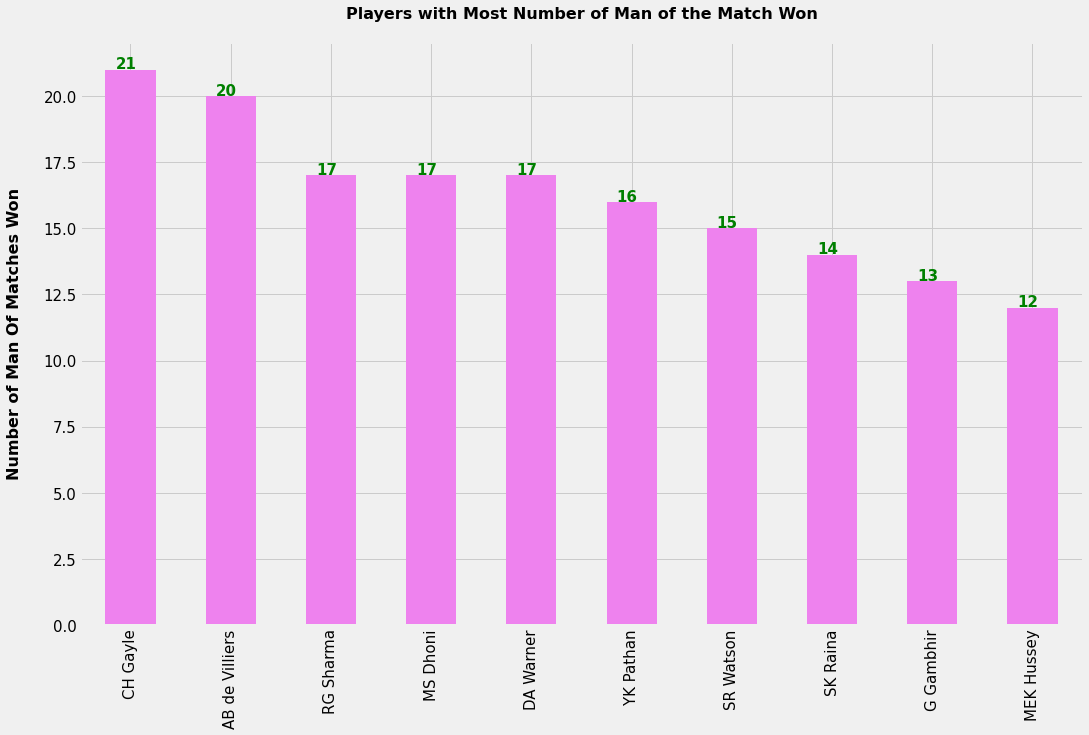

In [47]:
mom=man_of_match.plot.bar(figsize=(16,10), color='violet', fontsize=15)
mom.set_title('Players with Most Number of Man of the Match Won\n', fontsize=16, fontweight='bold')
mom.set_ylabel('Number of Man Of Matches Won\n', fontsize=16, fontweight='bold')
for i in mom.patches:
    mom.text(i.get_x()+0.1, i.get_height()+0.04, i.get_height(), fontsize=15, fontweight='bold', color='green') 


### CHRIS GAYLE RECEIVED MOST NO.OF MAN OF THE MATCH AWARDS (21) FOLLOWED BY AB DE VILLIERS AND RG SHARMA

In [48]:
batsman=len(delivery['batsman'].unique())
print('total numbers of players who batted atleast 1 ball in IPL so far :',batsman)

total numbers of players who batted atleast 1 ball in IPL so far : 516


In [49]:
bowler=len(delivery['bowler'].unique())
print('total numbers of players who bowled atleast 1 ball in IPL so far :',bowler)

total numbers of players who bowled atleast 1 ball in IPL so far : 405


In [50]:
faced_most_balls=delivery['batsman'].value_counts()[0:10]
faced_most_balls

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

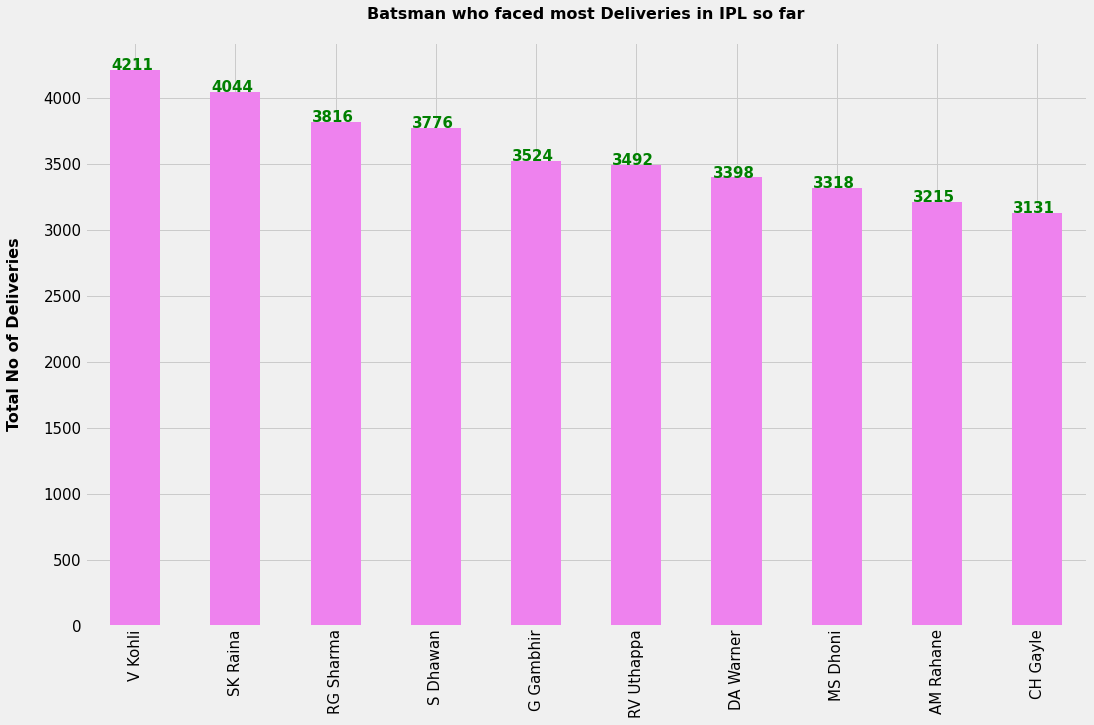

In [51]:
durable_batsman=faced_most_balls.plot.bar(figsize=(16,10), color='violet', fontsize=15)
durable_batsman.set_title('Batsman who faced most Deliveries in IPL so far\n', fontsize=16, fontweight='bold')
durable_batsman.set_ylabel('Total No of Deliveries\n', fontsize=16, fontweight='bold')
for i in durable_batsman.patches:
    durable_batsman.text(i.get_x()+0.01, i.get_height()+0.04, i.get_height(), fontsize=15, fontweight='bold', color='green') 

##### Virat Kohli faced most no.of ball while batting, followed by Suresh Raina, Rohit Sharma

In [52]:
bowled_most_balls=delivery['bowler'].value_counts()[0:10]
bowled_most_balls

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

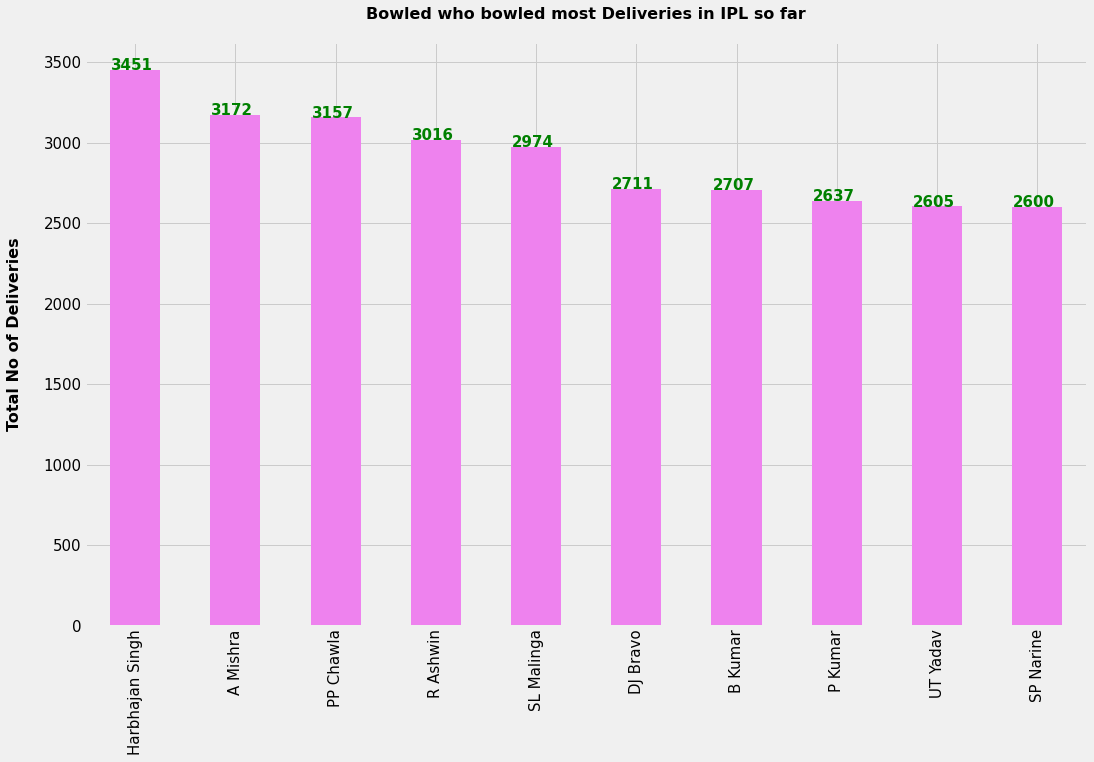

In [53]:
durable_bowler=bowled_most_balls.plot.bar(figsize=(16,10), color='violet', fontsize=15)
durable_bowler.set_title('Bowled who bowled most Deliveries in IPL so far\n', fontsize=16, fontweight='bold')
durable_bowler.set_ylabel('Total No of Deliveries\n', fontsize=16, fontweight='bold')
for i in durable_bowler.patches:
    durable_bowler.text(i.get_x()+0.01, i.get_height()+0.04, i.get_height(), fontsize=15, fontweight='bold', color='green') 

##### Harbhajan Singh has bowled most deliveries in IPL so far, followed by A mishra and PP Chawla

In [54]:
top_10_runs=delivery.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[0:10]
top_10_runs

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

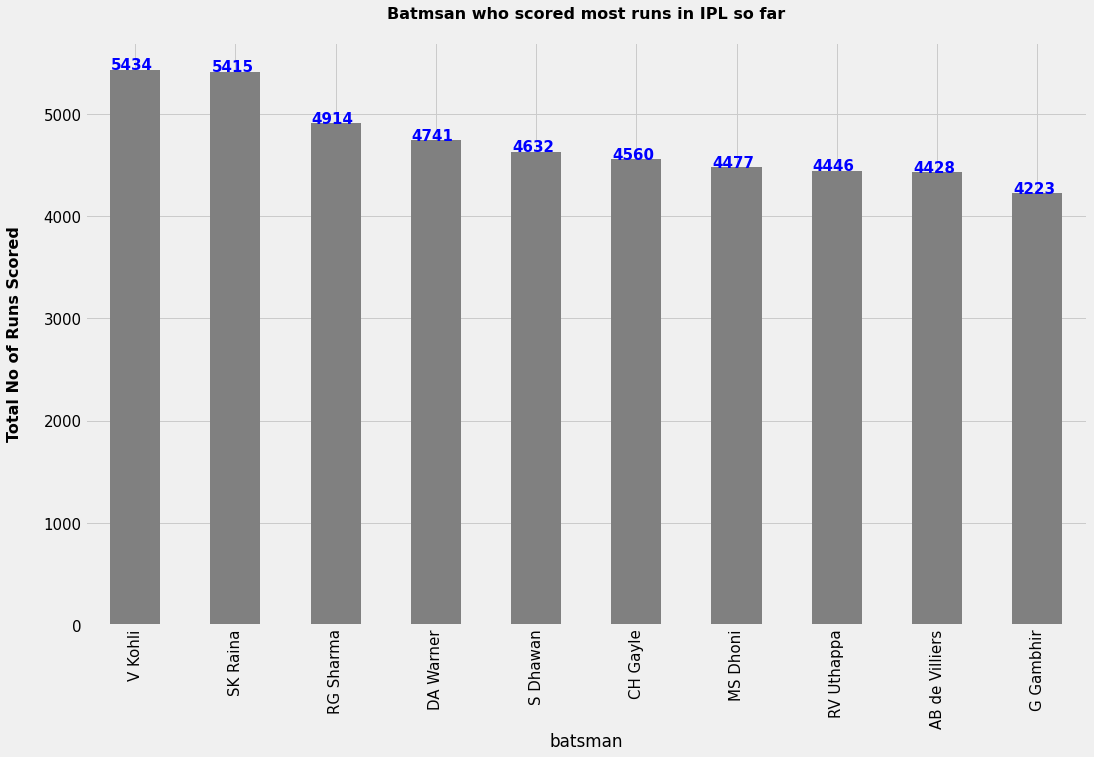

In [55]:
top_10_batsman=top_10_runs.plot.bar(figsize=(16,10), color='grey', fontsize=15)
top_10_batsman.set_title('Batmsan who scored most runs in IPL so far\n', fontsize=16, fontweight='bold')
top_10_batsman.set_ylabel('Total No of Runs Scored\n', fontsize=16, fontweight='bold')
for i in top_10_batsman.patches:
    top_10_batsman.text(i.get_x()+0.01, i.get_height()+0.04, i.get_height(), fontsize=15, fontweight='bold', color='blue')

##### Virat Kohli has scored most runs in IPL, followed by Raina, RG Sharma

# compare above top 3 batsman by runs by season

In [56]:
df=pd.merge(matches,delivery,left_on='id',right_on='match_id')

In [57]:
vkohli=df[df['batsman']=='V Kohli']
vkohli=vkohli.groupby('season')['batsman_runs'].sum()
vkohli

season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    539
2019    472
Name: batsman_runs, dtype: int64

In [58]:
sraina=df[df['batsman']=='SK Raina']
sraina=sraina.groupby('season')['batsman_runs'].sum()
sraina

season
2008    421
2009    434
2010    528
2011    438
2012    441
2013    548
2014    523
2015    374
2016    399
2017    442
2018    466
2019    401
Name: batsman_runs, dtype: int64

In [59]:
rgsharma=df[df['batsman']=='RG Sharma']
rgsharma=rgsharma.groupby('season')['batsman_runs'].sum()
rgsharma

season
2008    404
2009    362
2010    404
2011    372
2012    433
2013    538
2014    390
2015    482
2016    489
2017    333
2018    297
2019    410
Name: batsman_runs, dtype: int64

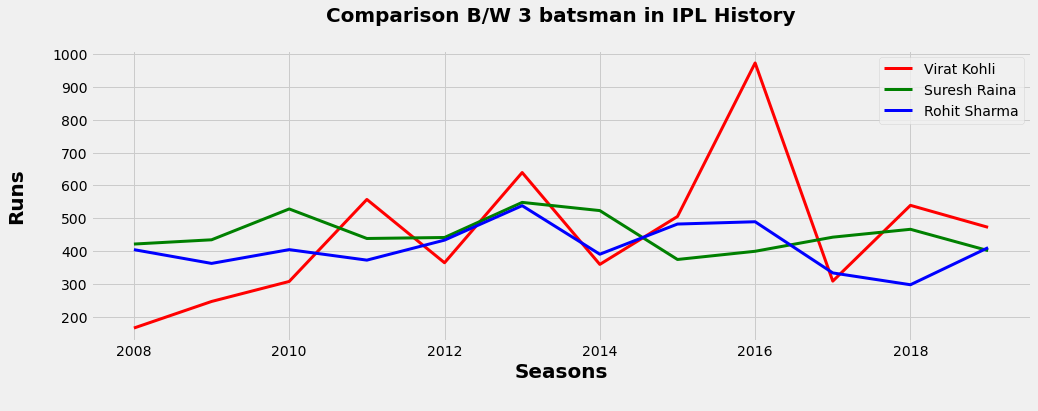

In [60]:
vkohli.plot(kind='line',linewidth=3,figsize=(15,5),color='red',label='Virat Kohli')
sraina.plot(kind='line',linewidth=3,figsize=(15,5),color='green',label='Suresh Raina')
rgsharma.plot(kind='line',linewidth=3,figsize=(15,5),color='blue',label='Rohit Sharma')

plt.title("Comparison B/W 3 batsman in IPL History\n",fontsize=20,fontweight='bold')
plt.xlabel("Seasons\n",fontsize=20,fontweight='bold')
plt.ylabel("Runs\n",fontsize=20,fontweight='bold')
plt.legend()
plt.show()

### SURESH RAINA IS CONSISTENT PLAYER IN IPL, COMPARED TO VIRAT AND ROHIT SHARMA

In [61]:
top_10_extraruns=delivery.groupby('bowler')['extra_runs'].sum().sort_values(ascending=False)[0:10]
top_10_extraruns

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
DW Steyn           171
SR Watson          171
Harbhajan Singh    170
Name: extra_runs, dtype: int64

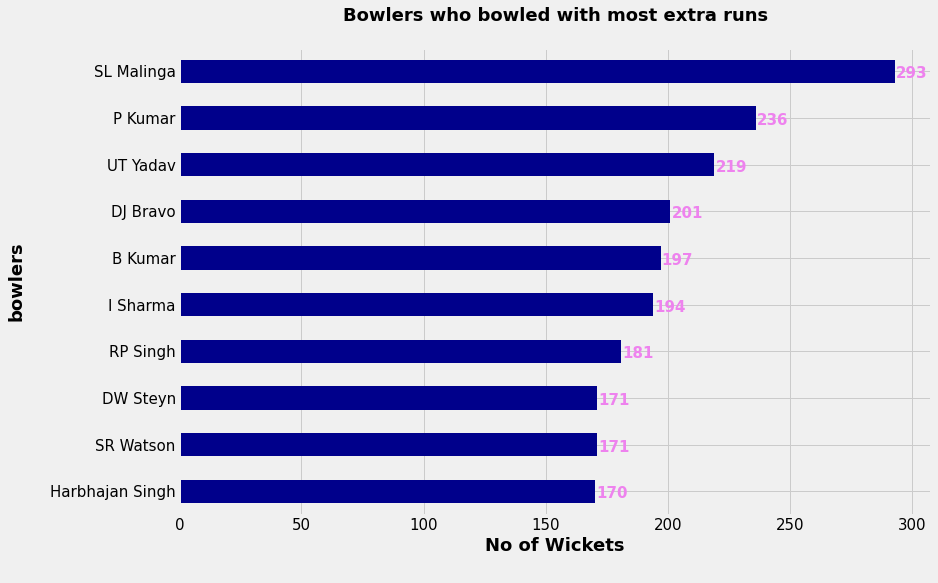

In [62]:
extraruns=top_10_extraruns.plot(kind='barh',figsize=(12,8),color='darkblue',fontsize=15)
extraruns.set_title('Bowlers who bowled with most extra runs\n', fontsize=18,fontweight='bold')
extraruns.set_xlabel('No of Wickets\n', fontsize=18,fontweight='bold')
extraruns.set_ylabel('bowlers\n', fontsize=18,fontweight='bold')
extraruns.invert_yaxis()


for i in extraruns.patches:
    extraruns.text(i.get_width()+0.5, i.get_y()+0.40, i.get_width(), fontsize=15, fontweight='bold', color='violet') 

##### Malinga has Conceded most extra runs in IPL while bowling

In [63]:
bowl_bat=delivery.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending=False)[0:10]
bowl_bat

bowler         player_dismissed
Z Khan         MS Dhoni            7
PP Ojha        MS Dhoni            7
SP Narine      RG Sharma           6
B Kumar        PA Patel            6
               AM Rahane           6
R Ashwin       RV Uthappa          6
A Mishra       RG Sharma           6
PP Chawla      AT Rayudu           6
Z Khan         G Gambhir           6
R Vinay Kumar  RG Sharma           6
Name: player_dismissed, dtype: int64

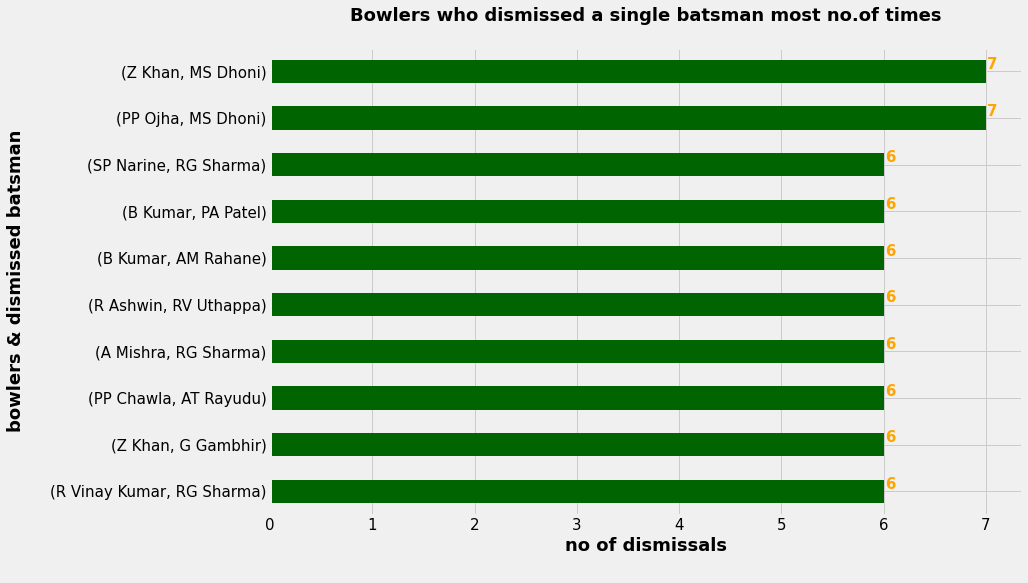

In [64]:
bowl_bat_war=bowl_bat.plot(kind='barh',figsize=(12,8),color='darkgreen',fontsize=15)
bowl_bat_war.set_title('Bowlers who dismissed a single batsman most no.of times\n', fontsize=18,fontweight='bold')
bowl_bat_war.set_xlabel('no of dismissals\n', fontsize=18,fontweight='bold')
bowl_bat_war.set_ylabel('bowlers & dismissed batsman\n', fontsize=18,fontweight='bold')
bowl_bat_war.invert_yaxis()


for i in bowl_bat_war.patches:
    bowl_bat_war.text(i.get_width()+0.01, i.get_y()+0.20, i.get_width(), fontsize=15, fontweight='bold', color='orange') 

ZAHEER KHAN AND PRAGYAN OJHA HAS DISMISSED MS DHONI(7-7) , WHICH IS MOST NO.OF TIMES BY A BOWLER

In [65]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


CHRIS GAYLE HAS SCORED 175* WHICH IS INDIVIDUALLY HIGHEST SCORE EVER BY AN BATMSAN IN IPL

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

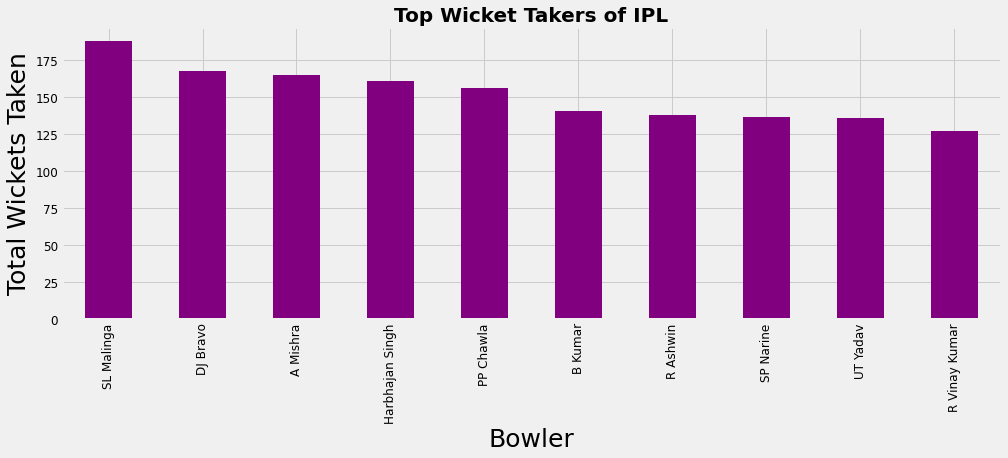

In [66]:
delivery.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

#### Malinga has taken most no.of Wickets in IPL followed by DJ Bravo and A Mishra

In [67]:
#We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(df.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(df.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(df.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


### Chris Gayle has highest strike rate followed by Pollard and Warner 

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

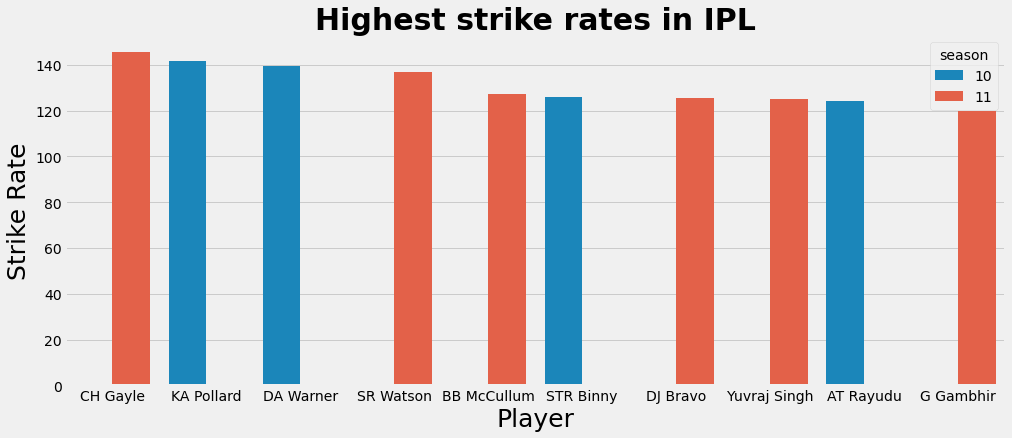

In [68]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

# Which bowler has taken wicket frequently

In [69]:
balls_bowled = pd.DataFrame(df.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(df[df['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(df.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [70]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'skyblue'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


# Observations
<ul>
<li>Total 756 matches played in 11 seasons of IPL.</li>
<li>out of 14 teams, Mumbai Indians & Chennai Superkings are the 2 most successful teams ever in IPL</li>
<li>Mumbai Indians has high winning ratio</li>
<li>Biggest Win by Run Margin is 146 runs by Mumbai Indians and RCB has won the most 10 wickets margin win</li>
<li>Mumbai Indians is the most successful IPL Team with 4 titles followed by Chennai Super Kings with 3IPL titles and Kolkata Knight Riders with 2 IPL Titles.</li>
<li>Eden Garden,Kolkata has hosted maximum no.of matches in IPL</li>
<li>Mumbai Indians has also won Highest No.of Matches followed by Chennai Super Kings and Kolkata Knight Riders, Highest Number of Toss followed by Kolkata Knight Riders and Chennai Super Kings and Highest No.of Matches while defending the score followed by Chennai Super Kings and Kings XI Punjab.</li>
<li>In all these matches played in IPL,about 61.24% teams chose bowling/fielding and 38.76% chose batting.</li>
<li>Kolkata Knight Riders has won most number of matches while chasing the score</li>
<li>CHRIS GAYLE RECEIVED MOST NO.OF MAN OF THE MATCH AWARDS (21) FOLLOWED BY AB DE VILLIERS AND RG SHARMA¶</li>
    <li>Virat Kohli faced most no.of ball while batting, followed by Suresh Raina, Rohit Sharma</li>
    <li>Virat Kohli has scored most runs in IPL, followed by Raina, RG Sharma</li>
    <li>Harbhajan Singh has bowled most deliveries in IPL so far, followed by A mishra and PP Chawla</li>
    <li>Malinga has Conceded most extra runs in IPL while bowling</li>
    <li>ZAHEER KHAN AND PRAGYAN OJHA HAS DISMISSED MS DHONI(7-7) , WHICH IS MOST NO.OF TIMES BY A BOWLER</li>
    <li>CHRIS GAYLE HAS SCORED 175* WHICH IS INDIVIDUALLY HIGHEST SCORE EVER BY AN BATMSAN IN IPL</li>
    <li>Malinga has taken most no.of Wickets in IPL followed by DJ Bravo and A Mishra</li>
    <li>Chris Gayle has highest strike rate followed by Pollard and Warner</li>
</ul>

## Ad companies should endorse Mumbai Indians, Chennai Super Kings and Kolkata Knight riders team
## for players, companies should hire Virat Kohli, Chris Gayle and Lasith Malinga